In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_fDE import Class
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from scipy.optimize import minimize, brentq, curve_fit
from scipy.integrate import cumtrapz
from scipy.interpolate import interp1d
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import AutoMinorLocator, LogLocator, NullFormatter
from matplotlib.patches import Patch
import scienceplots
import seaborn as sns
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import Normalize, ListedColormap
import matplotlib.colors as mcolors
plt.style.use('mine.mplstyle')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "text.latex.preamble": r"\usepackage{amssymb}"
})

In [2]:
# Define parameters as a dictionary
params = {
    'output': '',
    # Cosmological parameters
    #'h': 0.6821,
    'theta_s_100': 1.04178,
    'A_s': 2.216e-9,
    'n_s': 0.9686,
    'omega_b': 0.02253,
    'omega_cdm': 0.1177,
    'tau_reio': 0.085,
    # Neutrinos and relativistic species
    'N_ncdm': 1,
    'N_ur': 2.0328,
    'm_ncdm': 0.06,
    'Omega_Lambda': 0,
    'fluid_equation_of_state': 'faDE'
}

## 1. Example with $f_{\rm DE}(a)=1+f_a\left(1-a\right)$

In [6]:
faV=-2
M=Class()
M.set(params)
M.set({'fa_fld':faV})
M.compute()
print("h=",np.round(M.h(),4))

h= 1.2244


In [7]:
baM = M.get_background()
rhoDE=baM['(.)rho_fld']
fDE=rhoDE/rhoDE[-1]
wDE=baM['(.)w_fld']
z=baM['z']

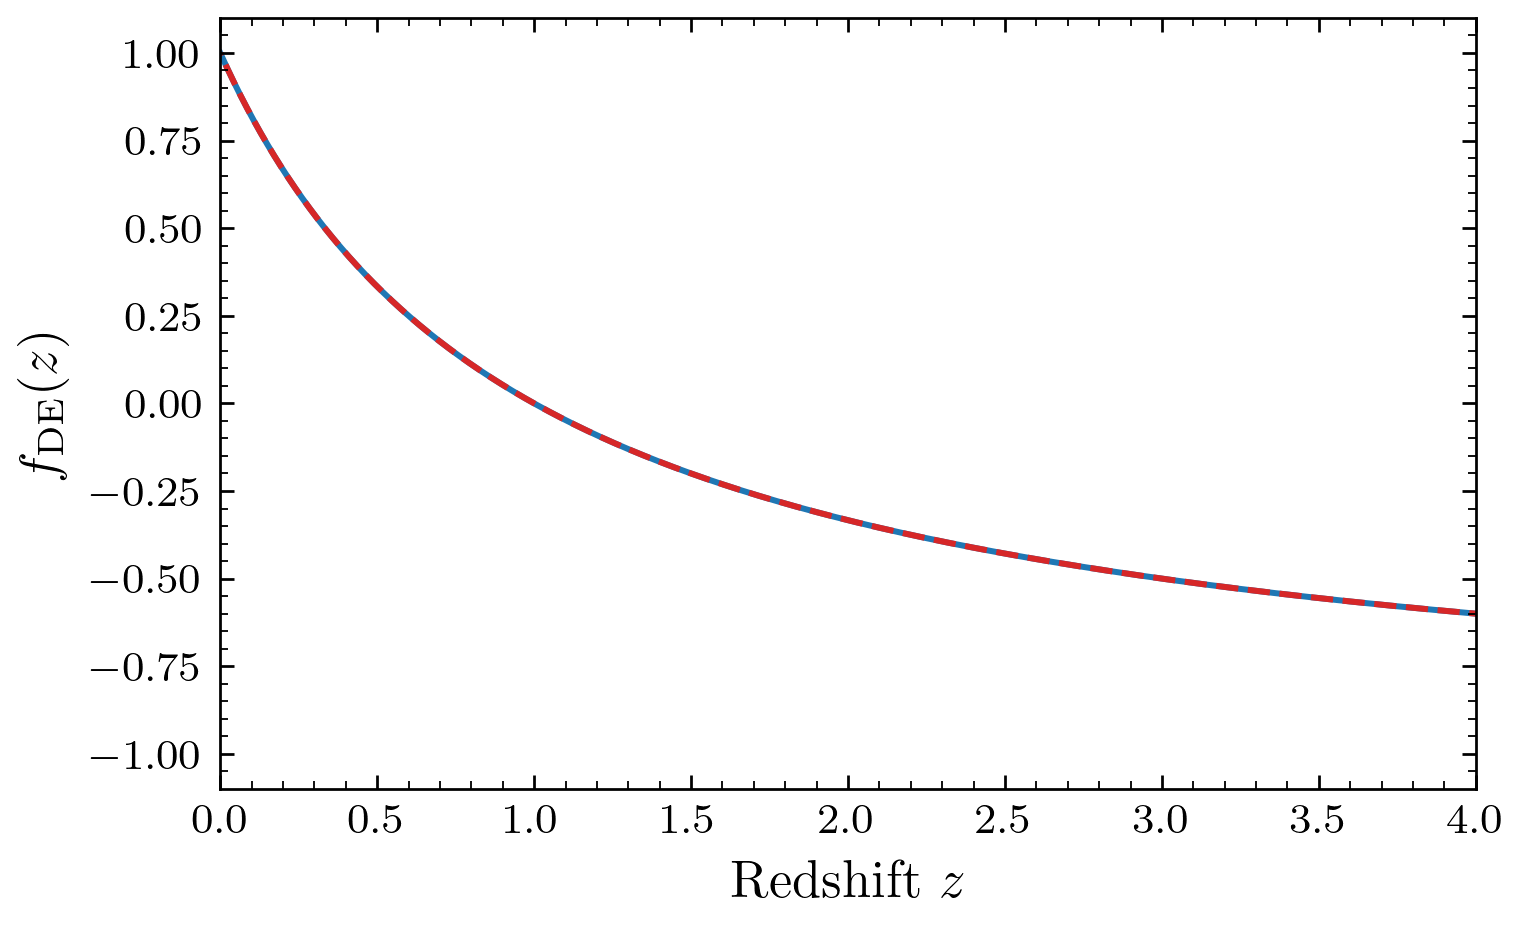

In [8]:
plt.plot(z,fDE,c='tab:blue',lw=1.2)
#plt.plot(z,wDE,c='tab:purple',lw=1.2)
plt.plot(z, 1+faV*z/(1+z),ls='--',lw=1.2,c='tab:red')
plt.xlim(0,4)
plt.xlabel(r'Redshift $z$')
plt.ylabel(r'$f_{\rm DE}(z)$')
plt.show()

## 2. Example with $f_{\rm DE}(a)=1+\left(f_{\rm pv}-1 \right)\frac{1-a}{1-a_{\rm pv}}$

In [6]:
def from_fp_ap_to_fa(fp,ap):
    return (fp-1)/(1-ap)
def from_fa_ap_to_fp(fa,ap):
    return 1+fa*(1-ap)
fpv=0.4
apv=2/3
fav=from_fp_ap_to_fa(fpv,apv)
M2=Class()
M2.set(params)
#M2.set({'fa_fld':fav})
M2.set({'fp_fld':fpv,'ap_fld':apv,'fluid_equation_of_state': 'fpDE'})
       #'input_verbose': 10, 'background_verbose': 10,'perturbations_verbose': 1,})
M2.compute()
print("h=",np.round(M2.h(),4))

h= 1.0303


In [7]:
baM2 = M2.get_background()
rhoDE_v2=baM2['(.)rho_fld']
fDE_v2=rhoDE_v2/rhoDE_v2[-1]
wDE_v2=baM2['(.)w_fld']
z_v2=baM2['z']

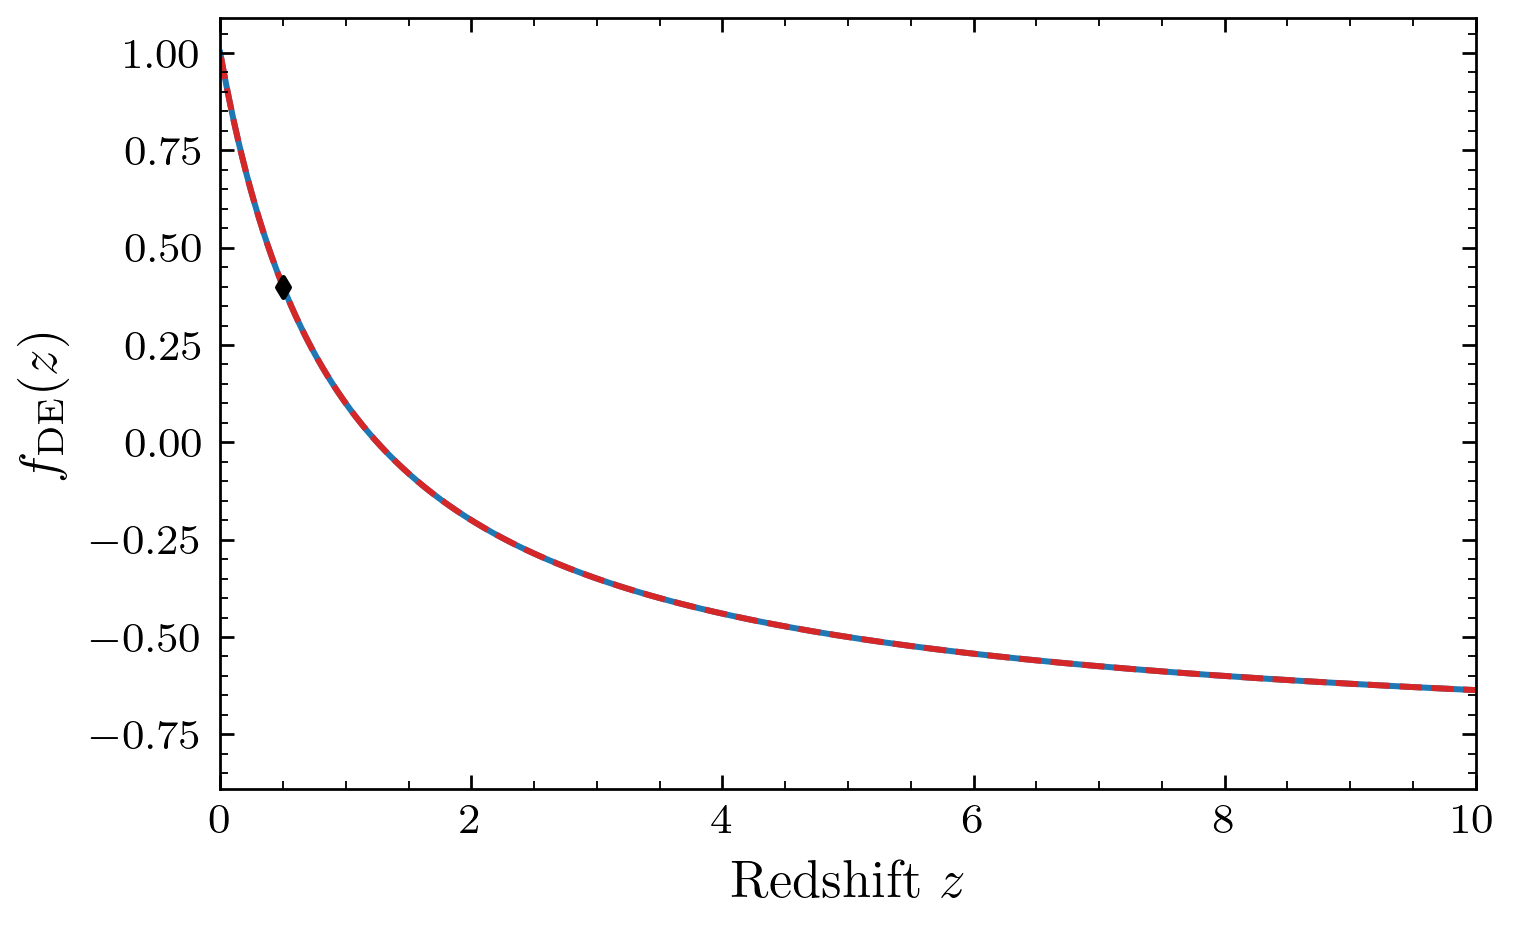

In [8]:
plt.plot(z_v2,fDE_v2,zorder=1,lw=1.2,c='tab:blue')
plt.plot(z_v2, 1+fav*z_v2/(1+z_v2),ls='--',zorder=1,lw=1.2,c='tab:red')
#plt.plot(z,wDE,c='tab:purple',lw=1.2,zorder=1)
plt.scatter(1/apv-1,fpv, marker='d',color='k', s=8,zorder=2)
plt.xlim(0,10)
plt.xlabel(r'Redshift $z$')
plt.ylabel(r'$f_{\rm DE}(z)$')
plt.show()